# SHSS

## Required Equations
Without wind tunnel data you can only produce the plots. Each parameter plotted against $\beta$

### Variables

## Pilot's Data
- δr
- δa
- δFr
- δFa
- φ
- β

## Order of Analysis

## Python Code

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Constants

### Functions

In [81]:
def standardize_columns(df, column_mapping):
    # Rename columns based on the exact mapping
    df.rename(columns=column_mapping, inplace=True)
    return df

### Load Data

In [82]:
df_shss = pd.read_excel("./demo_data/demo_data.xlsx")

column_mapping = {
    # "Column Name in Excel": "Standardized Name"
    "δr": "delta_r",
    "δa": "delta_a",
    "δFr": "delta_Fr",
    "δFa": "delta_Fa",
    "φ": "phi",
    "β": "beta",
}

dfs = [standardize_columns(df, column_mapping) for df in [df_shss]]

### Data Analysis

#### Plot

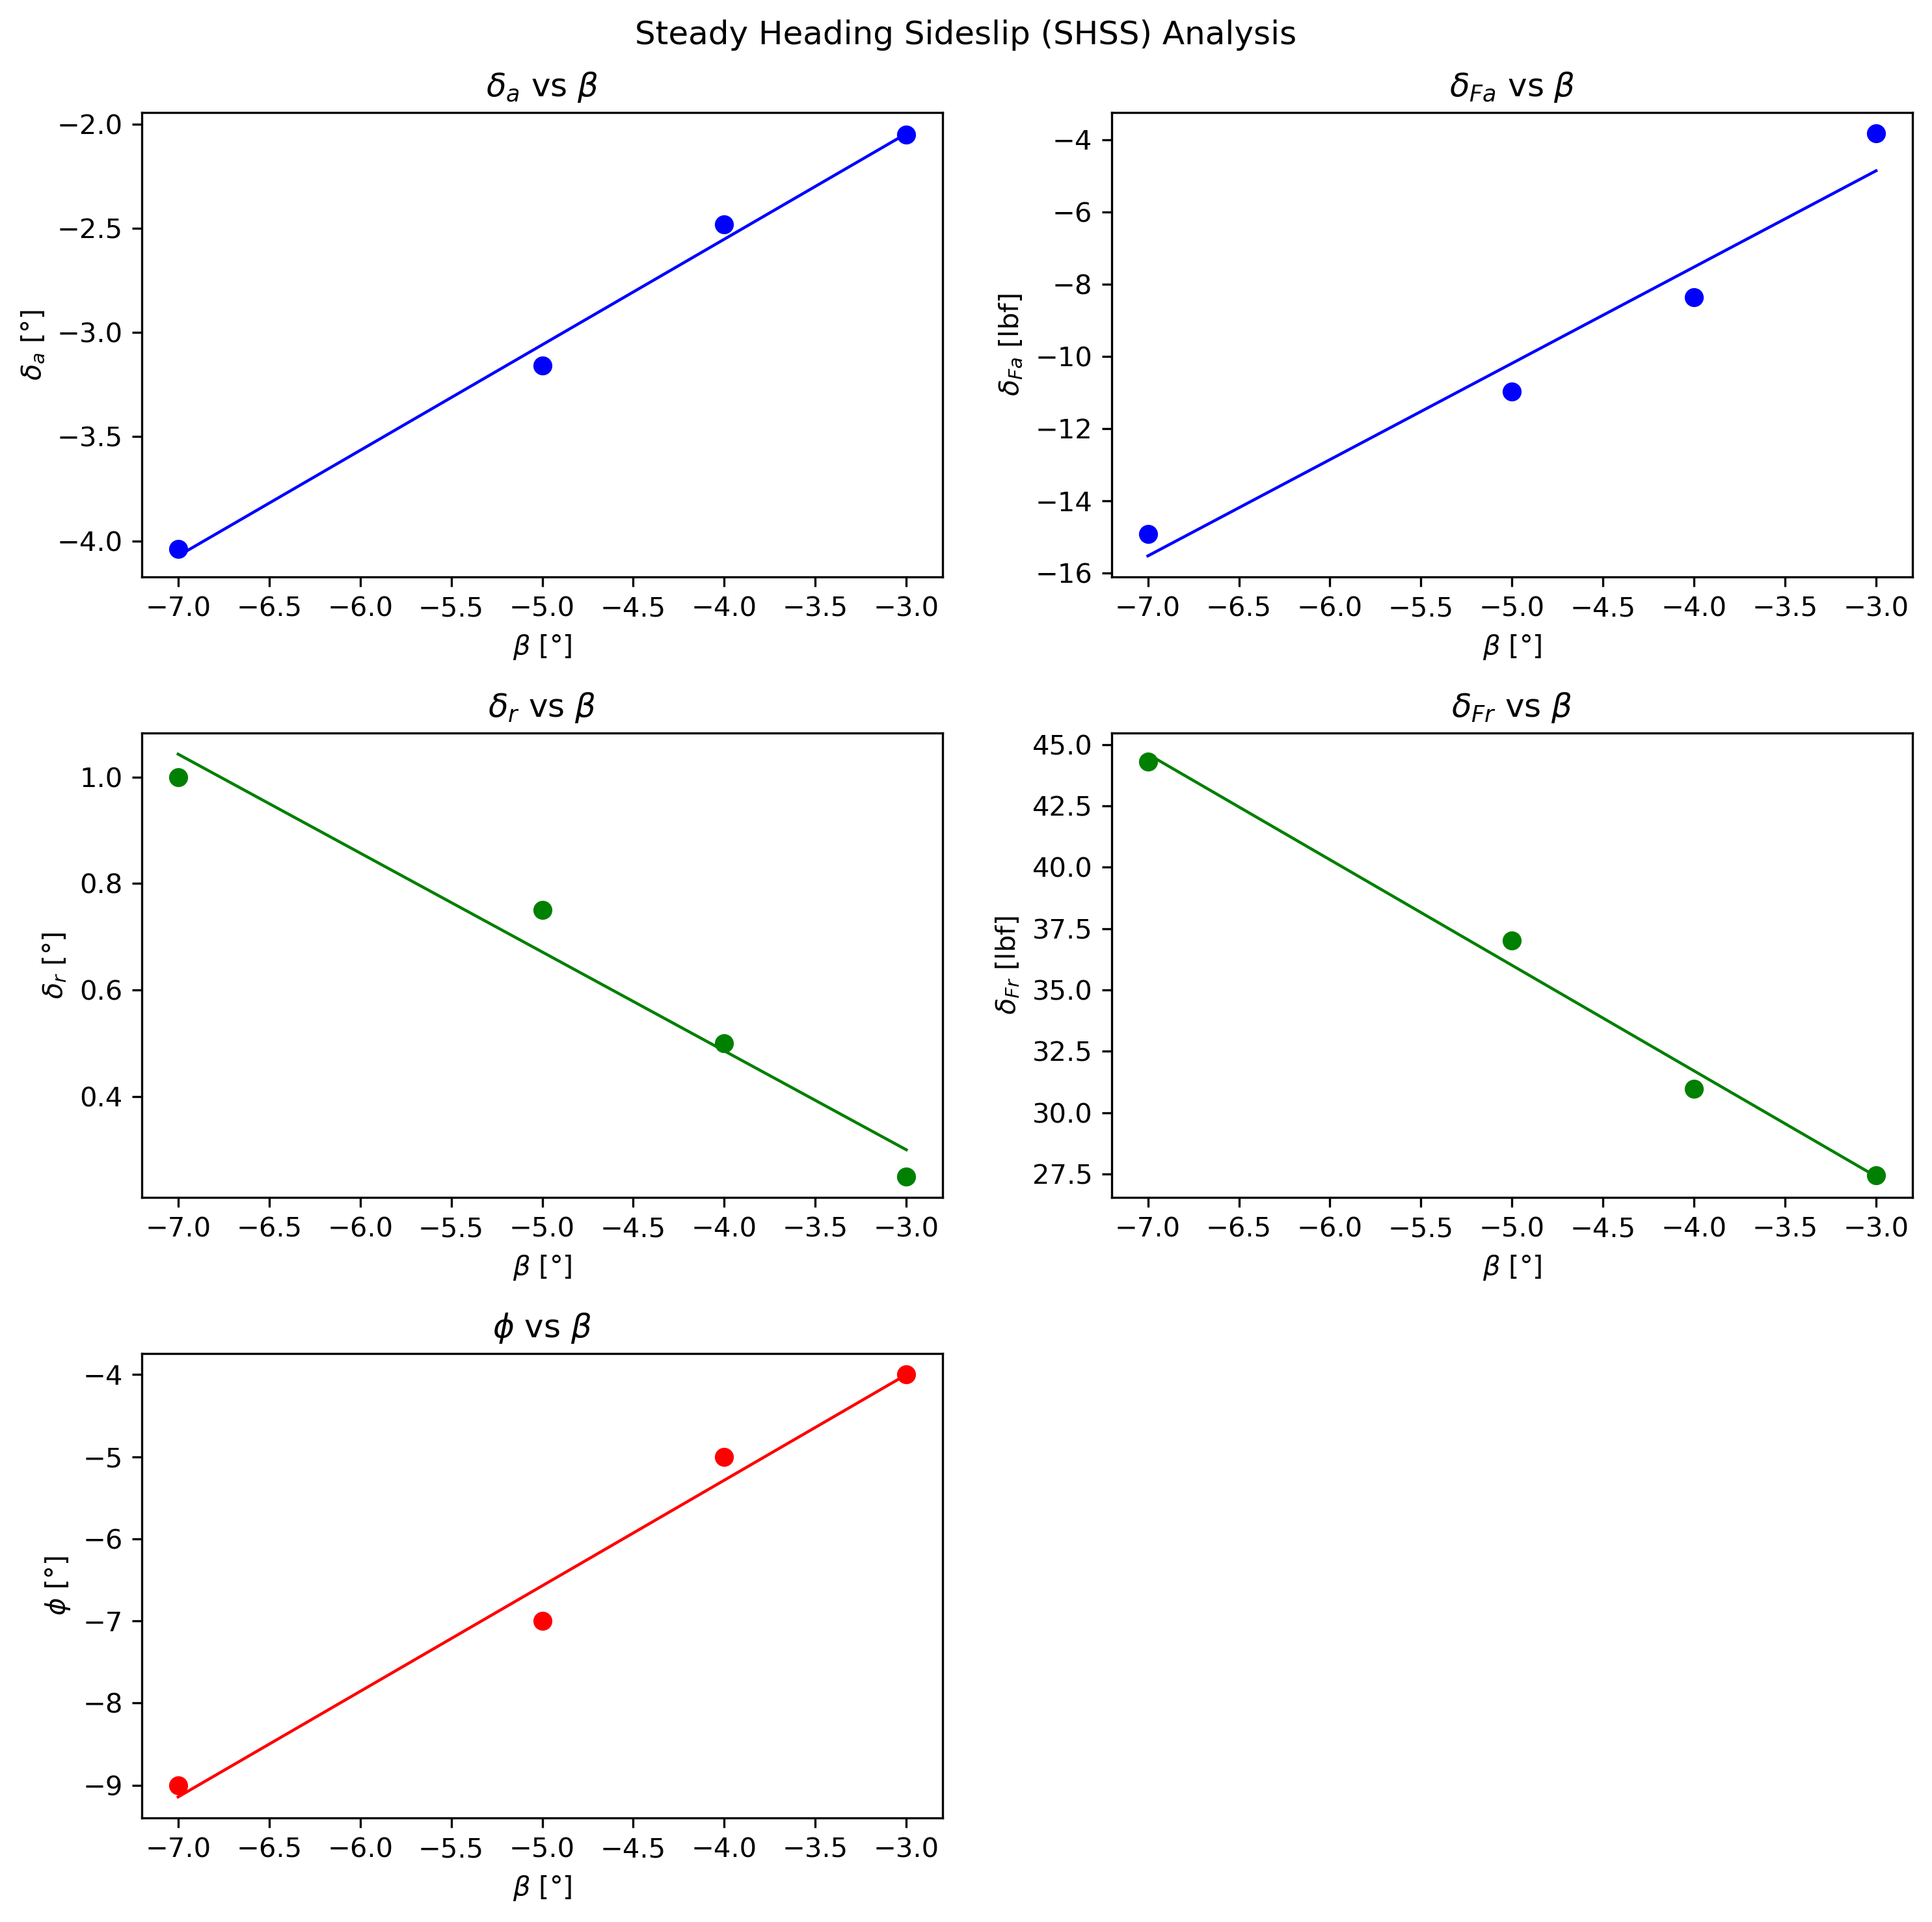

In [83]:
# Create the figure and a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10), dpi=300)  # Adjust figsize as needed

latex_labels = {
    "delta_a": r"$\delta_a$",
    "delta_Fa": r"$\delta_{Fa}$",
    "delta_r": r"$\delta_r$",
    "delta_Fr": r"$\delta_{Fr}$",
    "phi": r"$\phi$",
}
label_units = {
    "delta_a": "°",
    "delta_Fa": "lbf",
    "delta_r": "°",
    "delta_Fr": "lbf",
    "phi": "°",
}
parameters = ["delta_a", "delta_Fa", "delta_r", "delta_Fr", "phi"]
colours = ["blue", "blue", "green", "green", "red"]

for i in range(5):
    row = i // 2
    col = i % 2
    param = parameters[i]
    axs[row, col].scatter(
        df_shss["beta"],
        df_shss[param],
        c=colours[i],
        label=f"{latex_labels[param]} vs $\\beta$",
    )
    axs[row, col].set_xlabel(r"$\beta$ [°]")
    axs[row, col].set_ylabel(f"{latex_labels[param]} [{label_units[param]}]")
    axs[row, col].set_title(f"{latex_labels[param]} vs $\\beta$")
    # Fit a linear line to each plot
    x = df_shss["beta"]
    y = df_shss[param]
    m, b = np.polyfit(x, y, 1)  # Perform linear fit
    axs[row, col].plot(x, m * x + b, color=colours[i], linestyle="-", linewidth=1)

# Fit a linear line to each plot
parameters = ["delta_a", "delta_Fa", "delta_r", "delta_Fr", "phi"]
colours = ["blue", "blue", "green", "green", "red"]
for i, param in enumerate(parameters):
    row = i // 2
    col = i % 2
    x = df_shss["beta"]
    y = df_shss[param]
    m, b = np.polyfit(x, y, 1)  # Perform linear fit
    axs[row, col].plot(x, m * x + b, color=colours[i], linestyle="-", linewidth=1)

axs[2, 1].axis("off")
plt.suptitle("Steady Heading Sideslip (SHSS) Analysis")
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.show()

# Save the figure
fig.savefig("./output/plots/shss_plot.png")

for i, param in enumerate(parameters):
    subfig = plt.figure(figsize=(6, 5), dpi=300)
    plt.scatter(
        df_shss["beta"],
        df_shss[param],
        color=colours[i],
        label=f"{latex_labels[param]} vs $\\beta$",
    )
    plt.xlabel("beta")
    plt.ylabel(f"{latex_labels[param]} [{label_units[param]}]")
    plt.xlabel(r"$\beta$ [°]")
    plt.title(f"{latex_labels[param]} vs $\\beta$")
    x = df_shss["beta"]
    y = df_shss[param]
    m, b = np.polyfit(x, y, 1)  # Perform linear fit
    plt.plot(x, m * x + b, color=colours[i], linestyle="-", linewidth=1)
    plt.tight_layout()
    subfig.savefig(f"./output/plots/plot_{param} v Beta.png")
    plt.close(subfig)